# Hack Day 2 - Twitter Sentiment Analysis

## Loading Train data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', encoding = 'latin-1')

### Exploring Data

In [3]:
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
train.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [5]:
train.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


## Loading Test Data set

### Pulling 20 Tweets from Twitter

In [7]:
from twython import Twython

CONSUMER_KEY = '0pJRCT1emkOcrtxHl7lMN4N5A'
CONSUMER_SECRET = 'IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [8]:
twitter

<Twython: 0pJRCT1emkOcrtxHl7lMN4N5A>

In [9]:
dir(Twython)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_error_message',
 '_request',
 'add_list_member',
 'construct_api_url',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_list_members',
 'create_metadata',
 'create_mute',
 'create_place',
 'create_saved_search',
 'cursor',
 'delete_list',
 'delete_list_member',
 'delete_list_members',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_mute',
 'destroy_saved_search',
 'destroy_status',
 'encode',
 'get',
 'get_account_settings',
 'get_application_rate_limit_status',
 'get_authentication_tokens',
 'get_authorized_tokens',
 'get_availabl

In [10]:
help(Twython).search

Help on class Twython in module twython.api:

class Twython(twython.endpoints.EndpointsMixin, builtins.object)
 |  Twython(app_key=None, app_secret=None, oauth_token=None, oauth_token_secret=None, access_token=None, token_type='bearer', oauth_version=1, api_version='1.1', client_args=None, auth_endpoint='authenticate')
 |  
 |  Method resolution order:
 |      Twython
 |      twython.endpoints.EndpointsMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, app_key=None, app_secret=None, oauth_token=None, oauth_token_secret=None, access_token=None, token_type='bearer', oauth_version=1, api_version='1.1', client_args=None, auth_endpoint='authenticate')
 |      Instantiates an instance of Twython. Takes optional parameters for
 |      authentication and such (see below).
 |      
 |      :param app_key: (optional) Your applications key
 |      :param app_secret: (optional) Your applications secret key
 |      :param oauth_token: (optional) When using **OAuth 

AttributeError: 'NoneType' object has no attribute 'search'

In [11]:
results = twitter.search(q = 'data science', count = 20)

type(results)

dict

In [12]:
results

{'statuses': [{'created_at': 'Sat Jan 25 08:09:19 +0000 2020',
   'id': 1220981964838264832,
   'id_str': '1220981964838264832',
   'text': 'The latest The Smart contract Daily! https://t.co/NbaqFHY93q Thanks to @nullpackets #blockchain #ai',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'blockchain', 'indices': [84, 95]},
     {'text': 'ai', 'indices': [96, 99]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'nullpackets',
      'name': '$run the juels {Non-giver of LINK}',
      'id': 771888223698157568,
      'id_str': '771888223698157568',
      'indices': [71, 83]}],
    'urls': [{'url': 'https://t.co/NbaqFHY93q',
      'expanded_url': 'https://paper.li/sajidmirza/1510385788?edition_id=00676c60-3f46-11ea-ae35-0cc47a0d15fd',
      'display_url': 'paper.li/sajidmirza/151…',
      'indices': [37, 60]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
   'in_reply_to_s

In [13]:
all_items = results['statuses']

In [14]:
tweet_df = pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Sat Jan 25 08:09:19 +0000 2020,1220981964838264832,1220981964838264832,The latest The Smart contract Daily! https://t...,False,"{'hashtags': [{'text': 'blockchain', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sat Jan 25 08:09:19 +0000 2020,1220981963638571009,1220981963638571009,Security analytics: It’s all about the data ht...,False,"{'hashtags': [{'text': 'cybersecurity', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sat Jan 25 08:09:19 +0000 2020,1220981962036404224,1220981962036404224,London police deploy real-time facial recognit...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,None,...,0,False,False,False,en,"{'media': [{'id': 1220808874782949376, 'id_str...",NaN,NaN,NaN,NaN
3,Sat Jan 25 08:09:18 +0000 2020,1220981960585236481,1220981960585236481,Reasons You Need To Buy A Life Insurance Polic...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jan 25 08:09:18 +0000 2020,1220981959037460486,1220981959037460486,Ways in Which Libra Can Change the Dynamics of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [15]:
tweet_user = pd.DataFrame([d['user'] for d in results['statuses']])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,948134665990393857,948134665990393857,Data Science,_Data_Science,,Tweets About Data Science | Data Analytics | F...,None,{'description': {'urls': []}},False,1152,...,DDEEF6,333333,True,False,True,False,None,None,None,none
1,948134665990393857,948134665990393857,Data Science,_Data_Science,,Tweets About Data Science | Data Analytics | F...,None,{'description': {'urls': []}},False,1152,...,DDEEF6,333333,True,False,True,False,None,None,None,none
2,948134665990393857,948134665990393857,Data Science,_Data_Science,,Tweets About Data Science | Data Analytics | F...,None,{'description': {'urls': []}},False,1152,...,DDEEF6,333333,True,False,True,False,None,None,None,none
3,948134665990393857,948134665990393857,Data Science,_Data_Science,,Tweets About Data Science | Data Analytics | F...,None,{'description': {'urls': []}},False,1152,...,DDEEF6,333333,True,False,True,False,None,None,None,none
4,948134665990393857,948134665990393857,Data Science,_Data_Science,,Tweets About Data Science | Data Analytics | F...,None,{'description': {'urls': []}},False,1152,...,DDEEF6,333333,True,False,True,False,None,None,None,none


In [16]:
twitter_df = tweet_df.merge(tweet_user, left_index = True, right_index = True)

### Finding locations of most Tweets

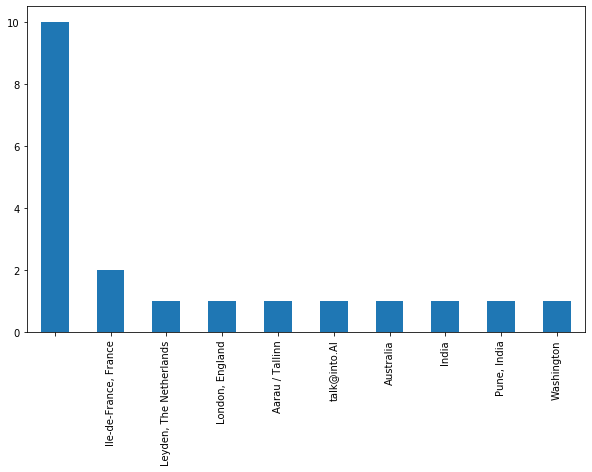

In [17]:
twitter_df.location.value_counts().plot(kind = 'bar', figsize = (10,6))

### Pulling 20 tweets with search term 'data science'

In [18]:
user_screenname = []
user_location = []
user_name = []
user_tz = []
tweet_text = []
tweet_tm = []

In [19]:
for status in twitter.search(q = 'data science', result_type = 'popular', lang = 'en', count = 20)['statuses']:

    user = status['user']['screen_name']
    text = status['text']
    tm = status['created_at']
    loc = status['user']['location']
    nm = status['user']['name'] 
    tz = status['user']['time_zone']

    print ()
    print (user, '--', loc, '--', nm, '--', tm, ':', text)
    print ()

    user_screenname.append(user)
    user_location.append(user_location)
    user_name.append(nm)
    user_tz.append(tz)
    tweet_text.append(text)
    tweet_tm.append(tm)


weareoversight --  -- American Oversight -- Thu Jan 23 20:45:20 +0000 2020 : Documents we obtained from the National Oceanic and Atmospheric Administration show that the shutdown not only had… https://t.co/dwF370VDEK


MmusiMaimane -- South Africa -- Mmusi Maimane -- Fri Jan 24 06:14:12 +0000 2020 : In order to secure the jobs of the future, in order to compete globally we MUST improve our performance in Maths an… https://t.co/R8aFgRJQld


Surgeon_General -- Washington, DC -- U.S. Surgeon General -- Fri Jan 24 00:29:22 +0000 2020 : It's never too late to quit smoking. Learn more about my new report with the latest data &amp; science on the health be… https://t.co/wB3EVuKN5H


LACaldwellDC -- Washington, DC -- Leigh Ann Caldwell -- Fri Jan 24 06:09:05 +0000 2020 : In the first two years of the Trump administration, more than 1,600 federal scientists left government, according t… https://t.co/AWlFIF8Kfm


BaldingsWorld -- On a plane -- The Abiding Balding -- Fri Jan 24 03:16:46 +0000 20

### Placing Tweets into a table

In [20]:
test = twitter_df[['created_at_x', 'text']]
test.head()

,created_at_x,text
0,Sat Jan 25 08:09:19 +0000 2020,The latest The Smart contract Daily! https://t...
1,Sat Jan 25 08:09:19 +0000 2020,Security analytics: It’s all about the data ht...
2,Sat Jan 25 08:09:19 +0000 2020,London police deploy real-time facial recognit...
3,Sat Jan 25 08:09:18 +0000 2020,Reasons You Need To Buy A Life Insurance Polic...
4,Sat Jan 25 08:09:18 +0000 2020,Ways in Which Libra Can Change the Dynamics of...


In [21]:
test.text[0]

'The latest The Smart contract Daily! https://t.co/NbaqFHY93q Thanks to @nullpackets #blockchain #ai'

In [22]:
test.drop('created_at_x', axis = 1, inplace = True)
test.rename(columns = {'text':'SentimentText'}, inplace = True)
test.index.names = ['ItemID']
test.head()

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,SentimentText
ItemID,
0,The latest The Smart contract Daily! https://t...
1,Security analytics: It’s all about the data ht...
2,London police deploy real-time facial recognit...
3,Reasons You Need To Buy A Life Insurance Polic...
4,Ways in Which Libra Can Change the Dynamics of...


### Exploring Test Data

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
SentimentText    20 non-null object
dtypes: object(1)
memory usage: 288.0+ bytes


In [24]:
test.head()

,SentimentText
ItemID,
0,The latest The Smart contract Daily! https://t...
1,Security analytics: It’s all about the data ht...
2,London police deploy real-time facial recognit...
3,Reasons You Need To Buy A Life Insurance Polic...
4,Ways in Which Libra Can Change the Dynamics of...


In [25]:
test.tail()

,SentimentText
ItemID,
15,RT @DataScienceFr: via @RichardEudes - Virtual...
16,RT @gp_pulipaka: Top Data Science Books to Hel...
17,"AMA with Sergey Kolesnikov @Scitator, The Crea..."
18,RT @lailah_grant: 2nd presenter - @joreen_arig...
19,"Rockefeller, Mastercard team up to leverage da..."


## Data Cleaning

### Combining both dataframes

In [26]:
df = pd.concat([train, test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100009 entries, 0 to 19
Data columns (total 3 columns):
ItemID           99989 non-null float64
Sentiment        99989 non-null float64
SentimentText    100009 non-null object
dtypes: float64(2), object(1)
memory usage: 3.1+ MB


C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
df.reset_index(inplace = True)

In [28]:
df.head()

,index,ItemID,Sentiment,SentimentText
0,0,1.0,0.0,is so sad for my APL frie...
1,1,2.0,0.0,I missed the New Moon trail...
2,2,3.0,1.0,omg its already 7:30 :O
3,3,4.0,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,4,5.0,0.0,i think mi bf is cheating on me!!! ...


In [29]:
df.tail()

,index,ItemID,Sentiment,SentimentText
100004,15,NaN,NaN,RT @DataScienceFr: via @RichardEudes - Virtual...
100005,16,NaN,NaN,RT @gp_pulipaka: Top Data Science Books to Hel...
100006,17,NaN,NaN,"AMA with Sergey Kolesnikov @Scitator, The Crea..."
100007,18,NaN,NaN,RT @lailah_grant: 2nd presenter - @joreen_arig...
100008,19,NaN,NaN,"Rockefeller, Mastercard team up to leverage da..."


In [30]:
# Checking for duplicates
df['SentimentText'].duplicated().sum()

2

In [31]:
df.drop_duplicates(subset = 'SentimentText', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100007 entries, 0 to 100008
Data columns (total 4 columns):
index            100007 non-null int64
ItemID           99989 non-null float64
Sentiment        99989 non-null float64
SentimentText    100007 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


In [32]:
# Removing special characters
df['removal_char'] = df['SentimentText'].str.replace('[^a-zA-Z0-9\s]', '')
df.head()

,index,ItemID,Sentiment,SentimentText,removal_char
0,0,1.0,0.0,is so sad for my APL frie...,is so sad for my APL friend
1,1,2.0,0.0,I missed the New Moon trail...,I missed the New Moon trailer
2,2,3.0,1.0,omg its already 7:30 :O,omg its already 730 O
3,3,4.0,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...
4,4,5.0,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT


In [33]:
import nltk
from nltk import word_tokenize

In [34]:
# Lowercasing and tokenizing words
df['removal_char'] = df['removal_char'].apply(lambda x: word_tokenize(x.lower()))

### Checking for distribution of negative and postive sentiments

In [35]:
import seaborn as sns

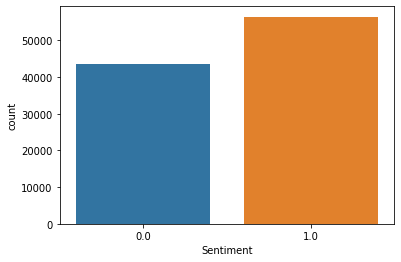

In [36]:
sns.countplot(x = df['Sentiment'])

In [37]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords

In [38]:
# Printing stopwords
stop_words = list(stopwords.words('english'))
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# Removing stopwords
df['stopword_removal'] = df['removal_char'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,index,ItemID,Sentiment,SentimentText,removal_char,stopword_removal
0,0,1.0,0.0,is so sad for my APL frie...,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,1,2.0,0.0,I missed the New Moon trail...,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,2,3.0,1.0,omg its already 7:30 :O,"[omg, its, already, 730, o]","[omg, already, 730]"
3,3,4.0,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,4,5.0,0.0,i think mi bf is cheating on me!!! ...,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]"


In [40]:
df['stopword_removal'] = df['stopword_removal'].apply(lambda x: ' '.join(x))

In [41]:
from nltk.stem import WordNetLemmatizer
df['stopword_removal'] = df['stopword_removal'].apply(lambda x: WordNetLemmatizer().lemmatize(x))

In [42]:
# Calculating polarity
df['sentiment_polarity'] = df['stopword_removal'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [43]:
# Calculating subjectivity
df['sentiment_subjectivity'] = df['stopword_removal'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [44]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
#vect = TfidfVectorizer()
vect = CountVectorizer()
X = vect.fit_transform(df['stopword_removal'])

In [46]:
X.shape

(100007, 118691)

In [47]:
df.drop(['ItemID', 'index'], axis = 1, inplace = True)
df.head()

,Sentiment,SentimentText,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
0,0.0,is so sad for my APL frie...,"[is, so, sad, for, my, apl, friend]",sad apl friend,-0.500000,1.000000
1,0.0,I missed the New Moon trail...,"[i, missed, the, new, moon, trailer]",missed new moon trailer,0.136364,0.454545
2,1.0,omg its already 7:30 :O,"[omg, its, already, 730, o]",omg already 730,0.000000,0.000000
3,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...",omgaga im sooo im gunna cry ive dentist since ...,0.000000,0.000000
4,0.0,i think mi bf is cheating on me!!! ...,"[i, think, mi, bf, is, cheating, on, me, tt]",think mi bf cheating tt,0.000000,0.000000


In [48]:
# Splitting train and test data to train model
train_df = df[:99989]
test_df = df[99989:]

In [49]:
y = train_df['Sentiment']
x = train_df['stopword_removal']

## Training Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
nb = MultinomialNB()
log = LogisticRegression()
dtc = DecisionTreeClassifier()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)

In [53]:
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [54]:
x_test_dtm.shape

(19998, 101499)

In [59]:
algorithms = [nb, log, dtc]
names = ['MultinomialNB', 'LogisticRegression', 'DecistionTreeClassifier']
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 =[]
    for i in range(len(algorithms)):
        algorithms[i].fit(x_train_dtm, y_train) 
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[i].predict(x_test_dtm)))
        precision.append(precision_score(y_test, algorithms[i].predict(x_test_dtm)))
        recall.append(recall_score(y_test, algorithms[i].predict(x_test_dtm)))
        f1.append(f1_score(y_test, algorithms[i].predict(x_test_dtm)))
    
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [60]:
classification()

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy,Precision,Recall,F1
MultinomialNB,0.753475,0.766744,0.801811,0.783886
LogisticRegression,0.755926,0.757009,0.828087,0.790955
DecistionTreeClassifier,0.689069,0.732579,0.696709,0.714194


## Predicting results

In [63]:
x_test_dtm_2 = vect.transform(test_df['stopword_removal'])

In [66]:
x_results = log.predict(x_test_dtm_2)

In [65]:
test_df.drop('Sentiment', axis = 1)

,SentimentText,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
99989,The latest The Smart contract Daily! https://t...,"[the, latest, the, smart, contract, daily, htt...",latest smart contract daily httpstconbaqfhy93q...,0.228571,0.435714
99990,Security analytics: It’s all about the data ht...,"[security, analytics, its, all, about, the, da...",security analytics data httpstcoxgrdhgmtb9 cyb...,0.000000,0.000000
99991,London police deploy real-time facial recognit...,"[london, police, deploy, realtime, facial, rec...",london police deploy realtime facial recogniti...,0.000000,0.000000
99992,Reasons You Need To Buy A Life Insurance Polic...,"[reasons, you, need, to, buy, a, life, insuran...",reasons need buy life insurance policy still y...,0.100000,0.400000
99993,Ways in Which Libra Can Change the Dynamics of...,"[ways, in, which, libra, can, change, the, dyn...",ways libra change dynamics crypto space httpst...,0.000000,0.000000
99994,"AMTD, Xiaomi Finance, SMU and ISS join to nurt...","[amtd, xiaomi, finance, smu, and, iss, join, t...",amtd xiaomi finance smu iss join nurture digit...,0.000000,0.000000
99995,"RT @igor0674: When physicists do mathematics, ...","[rt, igor0674, when, physicists, do, mathemati...",rt igor0674 physicists mathematics dont say th...,0.000000,0.000000
99996,"RT @DawnTJ90: Climate Science says......\n\n""d...","[rt, dawntj90, climate, science, says, differe...",rt dawntj90 climate science says different cli...,0.000000,0.600000
99997,I can’t teach you Data Science in 10 days http...,"[i, cant, teach, you, data, science, in, 10, d...",cant teach data science 10 days httpstco8gocjx...,0.000000,0.000000
99998,RT @gp_pulipaka: Some Common Data Science Stac...,"[rt, gppulipaka, some, common, data, science, ...",rt gppulipaka common data science stacks bigda...,-0.300000,0.500000


In [67]:
test_df['Sentiment'] = x_results
test_df

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sentiment,SentimentText,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
99989,1.0,The latest The Smart contract Daily! https://t...,"[the, latest, the, smart, contract, daily, htt...",latest smart contract daily httpstconbaqfhy93q...,0.228571,0.435714
99990,0.0,Security analytics: It’s all about the data ht...,"[security, analytics, its, all, about, the, da...",security analytics data httpstcoxgrdhgmtb9 cyb...,0.000000,0.000000
99991,0.0,London police deploy real-time facial recognit...,"[london, police, deploy, realtime, facial, rec...",london police deploy realtime facial recogniti...,0.000000,0.000000
99992,0.0,Reasons You Need To Buy A Life Insurance Polic...,"[reasons, you, need, to, buy, a, life, insuran...",reasons need buy life insurance policy still y...,0.100000,0.400000
99993,1.0,Ways in Which Libra Can Change the Dynamics of...,"[ways, in, which, libra, can, change, the, dyn...",ways libra change dynamics crypto space httpst...,0.000000,0.000000
99994,1.0,"AMTD, Xiaomi Finance, SMU and ISS join to nurt...","[amtd, xiaomi, finance, smu, and, iss, join, t...",amtd xiaomi finance smu iss join nurture digit...,0.000000,0.000000
99995,0.0,"RT @igor0674: When physicists do mathematics, ...","[rt, igor0674, when, physicists, do, mathemati...",rt igor0674 physicists mathematics dont say th...,0.000000,0.000000
99996,1.0,"RT @DawnTJ90: Climate Science says......\n\n""d...","[rt, dawntj90, climate, science, says, differe...",rt dawntj90 climate science says different cli...,0.000000,0.600000
99997,0.0,I can’t teach you Data Science in 10 days http...,"[i, cant, teach, you, data, science, in, 10, d...",cant teach data science 10 days httpstco8gocjx...,0.000000,0.000000
99998,0.0,RT @gp_pulipaka: Some Common Data Science Stac...,"[rt, gppulipaka, some, common, data, science, ...",rt gppulipaka common data science stacks bigda...,-0.300000,0.500000


In [70]:
polarity = []
for x in test_df['sentiment_polarity']:
    if x > 0:
        polarity.append(1)
    else:
        polarity.append(0)
polarity  

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]

In [72]:
test_df['polarity_binary'] = polarity

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
print( 'Accuracy', accuracy_score(test_df['Sentiment'], test_df['polarity_binary']))

Accuracy 0.6111111111111112
